___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___
# K Means Clustering with Python

This notebook is just a code reference for the video lecture and reading.

## Method Used

K Means Clustering is an unsupervised learning algorithm that tries to cluster data based on their similarity. Unsupervised learning means that there is no outcome to be predicted, and the algorithm just tries to find patterns in the data. In k means clustering, we have the specify the number of clusters we want the data to be grouped into. The algorithm randomly assigns each observation to a cluster, and finds the centroid of each cluster. Then, the algorithm iterates through two steps:
Reassign data points to the cluster whose centroid is closest. Calculate new centroid of each cluster. These two steps are repeated till the within cluster variation cannot be reduced any further. The within cluster variation is calculated as the sum of the euclidean distance between the data points and their respective cluster centroids.

## Import Libraries

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Create some Data

In [26]:
from sklearn.datasets import make_blobs

In [27]:
# Create Data
data = make_blobs(n_samples=200, n_features=2, 
                           centers=4, cluster_std=1.8,random_state=101)

In [28]:
data
# data=(array(x,y)_for all points,array(cluster_no_for_all_points))

(array([[-6.42884095e+00,  1.01411174e+01],
        [ 5.86867888e+00,  5.20110356e+00],
        [-3.76109375e-01,  3.26427943e+00],
        [ 2.16679181e+00,  9.56300522e+00],
        [ 5.09508570e+00,  7.20752718e+00],
        [-1.08788882e+01, -6.11318040e+00],
        [ 2.03405554e+00,  9.76664755e+00],
        [-1.71798771e+00,  1.41401140e+00],
        [ 1.16911341e+00,  8.24556988e+00],
        [-1.35185444e+00,  3.13245345e+00],
        [-6.18548214e+00,  9.67406555e+00],
        [-1.19856602e+00,  2.50408937e+00],
        [ 2.90296863e+00,  7.91251003e+00],
        [ 2.39250023e+00,  5.38173971e+00],
        [-5.27545147e+00,  9.63836659e+00],
        [-5.66814687e-01,  5.60262755e-02],
        [ 5.97336628e+00,  5.87172022e+00],
        [-2.31355268e+00,  5.23980092e-01],
        [-1.01344756e+01, -3.43130837e+00],
        [-4.54082629e+00,  1.13920174e+01],
        [-1.04155833e+01, -5.67545836e+00],
        [ 6.64796693e-01,  9.42304718e-02],
        [ 2.11460477e+00,  3.559

In [29]:
type(data)

tuple

In [30]:
data[0]

array([[-6.42884095e+00,  1.01411174e+01],
       [ 5.86867888e+00,  5.20110356e+00],
       [-3.76109375e-01,  3.26427943e+00],
       [ 2.16679181e+00,  9.56300522e+00],
       [ 5.09508570e+00,  7.20752718e+00],
       [-1.08788882e+01, -6.11318040e+00],
       [ 2.03405554e+00,  9.76664755e+00],
       [-1.71798771e+00,  1.41401140e+00],
       [ 1.16911341e+00,  8.24556988e+00],
       [-1.35185444e+00,  3.13245345e+00],
       [-6.18548214e+00,  9.67406555e+00],
       [-1.19856602e+00,  2.50408937e+00],
       [ 2.90296863e+00,  7.91251003e+00],
       [ 2.39250023e+00,  5.38173971e+00],
       [-5.27545147e+00,  9.63836659e+00],
       [-5.66814687e-01,  5.60262755e-02],
       [ 5.97336628e+00,  5.87172022e+00],
       [-2.31355268e+00,  5.23980092e-01],
       [-1.01344756e+01, -3.43130837e+00],
       [-4.54082629e+00,  1.13920174e+01],
       [-1.04155833e+01, -5.67545836e+00],
       [ 6.64796693e-01,  9.42304718e-02],
       [ 2.11460477e+00,  3.55938488e+00],
       [-1.

In [31]:
type(data[0])

numpy.ndarray

In [32]:
data.shape

AttributeError: 'tuple' object has no attribute 'shape'

In [33]:
data[0].shape

(200, 2)

In [34]:
data[1].shape

(200,)

In [35]:
data[1]

array([3, 2, 0, 2, 2, 1, 2, 0, 2, 0, 3, 0, 2, 2, 3, 0, 2, 0, 1, 3, 1, 0,
       0, 1, 3, 1, 1, 0, 2, 2, 3, 1, 2, 0, 0, 3, 1, 1, 1, 2, 1, 3, 3, 3,
       0, 3, 3, 0, 1, 2, 0, 3, 2, 0, 1, 3, 0, 0, 3, 2, 1, 2, 1, 3, 2, 0,
       1, 2, 2, 1, 2, 0, 1, 3, 1, 2, 2, 0, 3, 0, 0, 1, 2, 1, 0, 0, 0, 3,
       2, 1, 1, 1, 1, 3, 0, 1, 2, 3, 1, 2, 0, 1, 0, 0, 2, 0, 1, 2, 1, 1,
       0, 3, 3, 2, 1, 2, 3, 3, 2, 3, 0, 3, 0, 3, 0, 2, 3, 0, 1, 3, 3, 3,
       0, 1, 1, 3, 2, 3, 2, 0, 1, 2, 1, 3, 3, 2, 0, 1, 3, 3, 3, 3, 0, 2,
       0, 3, 2, 2, 2, 0, 2, 0, 0, 3, 1, 3, 0, 2, 3, 0, 2, 0, 3, 3, 0, 3,
       2, 2, 1, 2, 3, 1, 1, 3, 1, 1, 1, 1, 1, 0, 1, 2, 2, 3, 1, 0, 2, 2,
       1, 0])

In [36]:
data[2].shape

IndexError: tuple index out of range

## Visualize Data

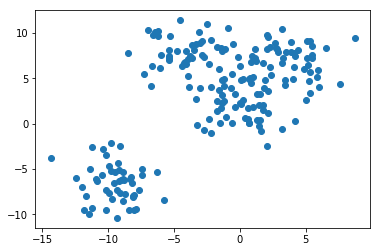

In [37]:
plt.scatter(data[0][:,0],data[0][:,1])

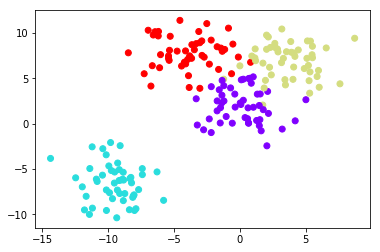

In [38]:
# plt.scatter(x=...,y=...,c=...,cmap='...')
plt.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap='rainbow')

## Creating the Clusters

In [39]:
from sklearn.cluster import KMeans

In [40]:
kmeans = KMeans(n_clusters=4)

In [41]:
kmeans.fit(data[0])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [42]:
kmeans.cluster_centers_

array([[-4.13591321,  7.95389851],
       [-9.46941837, -6.56081545],
       [-0.0123077 ,  2.13407664],
       [ 3.71749226,  7.01388735]])

In [43]:
kmeans.labels_

array([0, 3, 2, 3, 3, 1, 3, 2, 3, 2, 0, 2, 3, 3, 0, 2, 3, 2, 1, 0, 1, 2,
       2, 1, 0, 1, 1, 2, 3, 3, 0, 1, 3, 2, 2, 0, 1, 1, 1, 2, 1, 0, 0, 0,
       2, 3, 0, 2, 1, 2, 2, 0, 3, 2, 1, 0, 2, 2, 0, 3, 1, 3, 1, 0, 3, 2,
       1, 3, 3, 1, 3, 2, 1, 2, 1, 3, 3, 2, 0, 2, 2, 1, 3, 1, 2, 2, 2, 0,
       2, 1, 1, 1, 1, 2, 2, 1, 3, 0, 1, 3, 2, 1, 2, 2, 3, 2, 1, 3, 1, 1,
       3, 0, 0, 3, 1, 3, 0, 0, 3, 0, 2, 0, 2, 0, 2, 3, 0, 2, 1, 0, 0, 0,
       2, 1, 1, 0, 3, 0, 3, 2, 1, 3, 1, 0, 0, 3, 2, 1, 0, 0, 0, 0, 2, 3,
       2, 0, 3, 3, 3, 2, 3, 2, 2, 0, 1, 0, 2, 3, 0, 2, 3, 2, 0, 3, 2, 0,
       3, 3, 1, 3, 0, 1, 1, 0, 1, 1, 1, 1, 1, 2, 1, 3, 3, 0, 1, 2, 3, 3,
       1, 2])

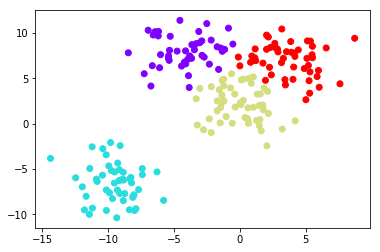

In [46]:
plt.scatter(data[0][:,0],data[0][:,1],c=kmeans.labels_,cmap='rainbow')

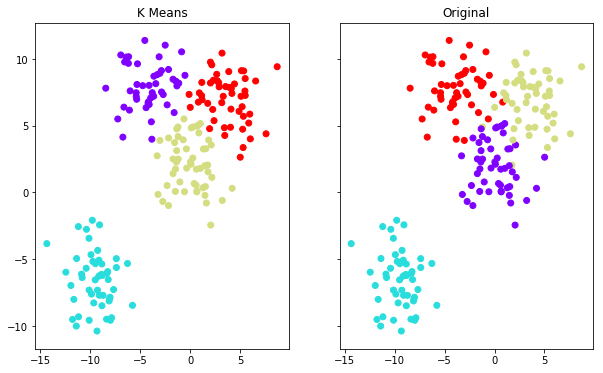

In [48]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,6))
ax1.set_title('K Means')
ax1.scatter(data[0][:,0],data[0][:,1],c=kmeans.labels_,cmap='rainbow')
ax2.set_title("Original")
ax2.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap='rainbow')

You should note, the colors are meaningless in reference between the two plots.

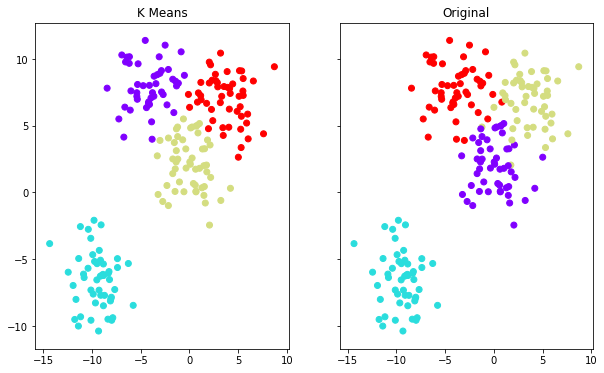

In [57]:
f,(ax1, ax2) = plt.subplots(1, 2,sharey='all', sharex='all',figsize=(10,6))
ax1.set_title('K Means')
ax1.scatter(data[0][:,0],data[0][:,1],c=kmeans.labels_,cmap='rainbow')
ax2.set_title("Original")
ax2.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap='rainbow')

# Great Job!